# Lab | Logisitc Regression, Handling Imbalanced Data
For this lab we will build a model on customer churn binary classification problem. You will be using Data/DATA_Customer-Churn.csv file.

## Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

## Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. ----  - Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
    - Scale the features either by using normalizer or a standard scaler.
    - Split the data into a training set and a test set.
    - Fit a logistic regression model on the training data.
    - Check the accuracy on the test data.

Note: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

In [597]:
# libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
pd.set_option('display.max_columns', None)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings('ignore')

In [598]:
churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")

In [599]:
churnData.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No


In [600]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Cleaning of column TotalCharges 

In [601]:
#TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
churnData.TotalCharges = pd.to_numeric(churnData.TotalCharges, errors="coerce")

In [602]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [603]:
#checking null values
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [604]:
# replacing null values in TotalCharge with the mean
churnData.TotalCharges.fillna(churnData.TotalCharges.mean(),inplace=True)

In [605]:
churnData.TotalCharges.isnull().sum()

0

### Modelling
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
    - Scale the features either by using normalizer or a standard scaler.
    - Split the data into a training set and a test set.
    - Fit a logistic regression model on the training data.
    - Check the accuracy on the test data.

In [606]:

x = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
# change Churn into numerical values
churnData.Churn= churnData.Churn.replace("No", 0).replace("Yes", 1)
y = churnData.Churn

In [607]:
#data = pd.concat([x, y], axis=1)

In [608]:
x.head(2)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50


In [609]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
5655,Male,0,No,No,65,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.10,1725.0,0
1411,Male,1,No,No,29,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-month,101.45,2948.6,0


In [610]:
#standardizing data
def scale_data(df):

    #standardizing
    scaler = StandardScaler()
    scaler.fit(df) #z score 
    x = scaler.transform(df) #gives an array
    x = pd.DataFrame(x, columns = df.columns) #transform it to a df
    return x
   

In [611]:
scale_data(x)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-1.277445,-0.439916,-1.160323,-0.994971
1,0.066327,-0.439916,-0.259629,-0.173876
2,-1.236724,-0.439916,-0.362660,-0.960399
3,0.514251,-0.439916,-0.746535,-0.195400
4,-1.236724,-0.439916,0.197365,-0.941193
...,...,...,...,...
7038,-0.340876,-0.439916,0.665992,-0.129281
7039,1.613701,-0.439916,1.277533,2.242808
7040,-0.870241,-0.439916,-1.168632,-0.855182
7041,-1.155283,2.273159,0.320338,-0.872777


In [612]:
def fit_model(x,y):
    # test_train _split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)
    
    model = LogisticRegression(random_state=0)
    model.fit(x_train, y_train)
            
    predicted_y = model.predict(x_test)
    predicted_y_train = model.predict(x_train)

In [613]:
fit_model(x,y)

In [614]:
model.score(x_test, y_test)

0.7378421900161031

In [615]:
#classification_report(y_test, predicted_y)

In [616]:
def performance_log(y_test, predicted_y):
    return pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Test': [accuracy_score(y_test, predicted_y),
                                        precision_score(y_test, predicted_y,pos_label=1),
                                        recall_score(y_test, predicted_y,pos_label=1)]})

In [617]:
performance_log(y_test, predicted_y)

,Error_metric,Test
0,Accuracy,0.737842
1,Precision,0.722710
2,Recall,0.755906


Confusion matrix for the train set
[[2565 1028]
 [ 942 2708]]


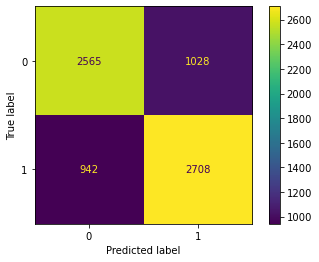



Confusion matrix for the test set
[[1139  442]
 [ 372 1152]]


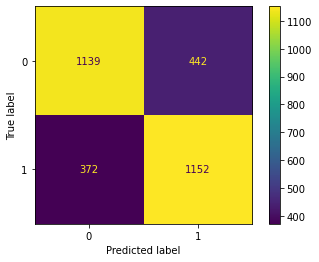

In [618]:
#do a function 

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,predicted_y_train))
plot_confusion_matrix(model,x_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, predicted_y))
plot_confusion_matrix(model,x_test,y_test, values_format = 'd')
plt.show()

### Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

In [619]:
churnData['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

### Downsampling

In [620]:
#In downsampling, we randomly sample without replacement from the majority class
category_0 = churnData[churnData['Churn'] == 0]
category_1 = churnData[churnData['Churn'] == 1]

category_0 = category_0.sample(len(category_1))
print(category_0.shape)
print(category_1.shape)

(1869, 16)
(1869, 16)


In [621]:
# data = churnData?
data = pd.concat([category_0, category_1], axis=0)
#shuffling the data
data = data.sample(frac=1)
data['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

--------

### Upsampling Method 1

In [520]:
category_a = churnData[churnData['Churn'] == 0]
category_b = churnData[churnData['Churn'] == 1]

In [521]:
category_b = category_b.sample(len(category_a), replace=True)
print(category_a.shape)

(5174, 16)


In [522]:
data = pd.concat([category_a, category_b], axis=0)
#shuffling the data
data = data.sample(frac=1)
data['Churn'].value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

-------

### Upsampling using SMOTE

The SMOTE algorithm can be broken down into following steps:

+ Randomly pick a point from the minority class.
+ Compute the k-nearest neighbors (for some pre-specified k) for this point.
+ Add k new points somewhere between the chosen point and each of its neighbors.

In [560]:
smote = SMOTE()

In [561]:
display(x.head(2))

display(y.head(2))

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50


0    0
1    0
Name: Churn, dtype: int64

In [562]:
x_sm, y_sm = smote.fit_resample(x, y)
y_sm.value_counts()

y= y_sm

In [564]:
 #standardizing
scaler = StandardScaler()
scaler.fit(x_sm) #z score 
x = scaler.transform(x_sm) #gives an array
x = pd.DataFrame(x_sm, columns = x_sm.columns) #transform it to a df
#display(df.head(2))
#print()
#display(x.head(2))
 # test_train _split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
        
predicted_y = model.predict(x_test)
predicted_y_train = model.predict(x_train)

In [565]:
model.score(x_test, y_test)

0.7378421900161031

Confusion matrix for the train set
[[2565 1028]
 [ 942 2708]]


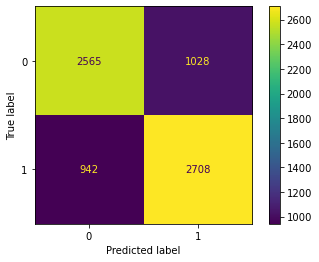



Confusion matrix for the test set
[[1139  442]
 [ 372 1152]]


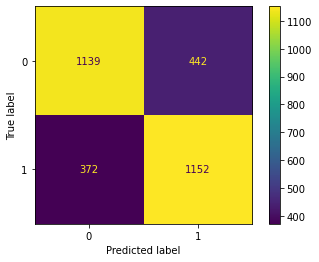

In [566]:
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,predicted_y_train))
plot_confusion_matrix(model,x_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, predicted_y))
plot_confusion_matrix(model,x_test,y_test, values_format = 'd')
plt.show()

In [567]:
performance_log(y_test, predicted_y)

,Error_metric,Test
0,Accuracy,0.737842
1,Precision,0.722710
2,Recall,0.755906


-------

### Downsampling using Tomeklinks

+ TomekLinks are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.
+ It does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.

In [494]:
tl = TomekLinks('majority')
x_tl, y_tl = tl.fit_resample(x, y)
y_tl.value_counts()

0    4620
1    1869
Name: Churn, dtype: int64

In [349]:
#??? does not work